# Using Housing Market Appreciation and Foursquare API to Determine the Best Locations for Future Business Development in Omaha, Nebraska

The parts of town in any major metropolitan area can vary wildly in terms of average resident income, crime rates, and economic opportunity. These metrics determine which areas of a city are growing and which are stagnating. If this information can be harnessed and visualized it would be of great help to potential business developers looking to build or expand into new markets.

In this notebook, the Amercian midwestern city of Omaha, Nebraska will be organized by zip code. Within each zip code the average price per square foot of single family homes will be examined over time in order to obtain the yearly appreciation rate of the area. The appreciation rate is a simple way to determine which areas of the city are the most desired by home buyers and will therefore show which parts of the city are growing economically as opposed to stagnating. These growing sections will generate the greatest demand for goods and services resulting in hotbeds for business success.

Once the fastest growing sections of the city are found, the section will then be clustered using K-means Clustering to see if any zip codes display business preferences to provide even more economic detail to future developers.

In [1]:
import numpy as np
import pandas as pd
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



The primary source of data for this project will be obtained through Redfin, a realestate website with a wonderful supply of housing data for free. The only downside of Redfin is their 350 datapoint limit per download meaning multiple datasets had to be downloaded from the website and uploaded to IBM cloud server. Below is an example dataframe of 350 rows followed by several other dataframes being uploaded.

In [2]:
# The code was removed by Watson Studio for sharing.

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,August-9-2019,Single Family Residential,4930 S 129th St,Omaha,NE,68137,172000,3,2.0,...,Sold,NaN,NaN,http://www.redfin.com/NE/Omaha/4930-S-129th-St...,GPRMLS,21914034.0,N,Y,41.209122,-96.115945
1,PAST SALE,July-26-2019,Single Family Residential,9608 S 173rd St,Omaha,NE,68136,300000,4,4.0,...,Sold,NaN,NaN,http://www.redfin.com/NE/Omaha/9608-S-173rd-St...,GPRMLS,21909883.0,N,Y,41.164223,-96.185320
2,PAST SALE,September-1-2017,Single Family Residential,10317 S 124 Ave,Papillion,NE,68046,365000,4,3.0,...,Sold,NaN,NaN,http://www.redfin.com/NE/Papillion/10317-S-124...,GPRMLS,21712309.0,N,Y,41.158438,-96.107045
3,PAST SALE,April-1-2020,Single Family Residential,17252 Drexel St,Omaha,NE,68135,410000,3,3.0,...,Sold,NaN,NaN,http://www.redfin.com/NE/Omaha/17252-Drexel-St...,GPRMLS,22003900.0,N,Y,41.192289,-96.183019
4,PAST SALE,August-5-2019,Single Family Residential,5387 S 194th St,Omaha,NE,68135,190000,3,2.0,...,Sold,NaN,NaN,http://www.redfin.com/NE/Omaha/5387-S-194th-St...,GPRMLS,21914140.0,N,Y,41.203011,-96.218371


In [3]:
body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-02-19.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_19 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-02-09.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_18 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-01-48.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_17 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-01-40.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_16 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-01-25.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_15 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-01-14.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_14 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-00-49.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_13 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-00-44.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_12 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-00-15.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_11 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-13-00-09.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_10 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-59-34.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_9 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-58-30.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_8 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-58-20.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-58-02.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_6 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-57-52.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-57-01.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)

body = client_9cc1e829eb364eeb975762bbc8a0b54a.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-khzyilauutpsgg',Key='redfin_2020-04-11-12-56-38.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)

This absurd amount of dataframes will be concatenated into a single dataframe.

In [4]:
df_omaha = pd.concat([df_data_1, df_data_3, df_data_4, df_data_5, df_data_6, df_data_7, df_data_8, df_data_9, df_data_10, df_data_11, df_data_12, df_data_13, df_data_14, df_data_15, df_data_16, df_data_17, df_data_18, df_data_19], axis=0)

In [5]:
df_omaha.shape

(6300, 27)

Redfin provides a wealth of information for each house listing, the majority of which are unneeded for this project.

In [6]:
for col in df_omaha.columns:
    print(col)

SALE TYPE
SOLD DATE
PROPERTY TYPE
ADDRESS
CITY
STATE OR PROVINCE
ZIP OR POSTAL CODE
PRICE
BEDS
BATHS
LOCATION
SQUARE FEET
LOT SIZE
YEAR BUILT
DAYS ON MARKET
$/SQUARE FEET
HOA/MONTH
STATUS
NEXT OPEN HOUSE START TIME
NEXT OPEN HOUSE END TIME
URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)
SOURCE
MLS#
FAVORITE
INTERESTED
LATITUDE
LONGITUDE


The awkward nature in which the data had to be downloaded resulted in a great deal of dulicated rows. No matter, as these can be easily dropped using python.

In [7]:
df_omaha.duplicated().sum()

2944

In [8]:
df_omaha.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
df_omaha.shape

(3356, 27)

The unnecessary columns will now be dropped.

In [10]:
df_omaha.drop(['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'ADDRESS', 'PRICE', 'LOCATION', 'LATITUDE', 'LONGITUDE'], axis = 1, inplace=True)

Any NA values will now be dropped.

In [11]:
df_omaha.dropna(inplace=True)

In [12]:
df_omaha.shape

(2847, 3)

In [13]:
df_omaha.head()

,SOLD DATE,ZIP OR POSTAL CODE,$/SQUARE FEET
0,August-9-2019,68137,116.0
1,July-26-2019,68136,96.0
2,September-1-2017,68046,127.0
3,April-1-2020,68135,148.0
4,August-5-2019,68135,140.0


Below is a quick check to ensure there are no unexpected zip code values recorded in the data.

In [14]:
df_omaha['ZIP OR POSTAL CODE'].unique()

array(['68137', '68136', '68046', '68135', '68154', '68164', '68116',
       '68022', '68132', '68104', '68106', '68138', '68124', '68117',
       '68114', '68118', '68127', '68130', '68105', '68134', '68122',
       '68152', '68107', '68122-2269', '68111', '68144', '68116-2238',
       '68108', '68111-0000', '68131', '68105-0000', '68106-3105',
       '68110', '68142', '68007', '68112', '68166', '68135-3572',
       '68107-1605', '68137-3730', '68137-3964', '68104-0000', '68146',
       '68164-2237', '68022-0000', '68147', '68104-3554', '68016',
       '51510', '68132-1705', '68114-0000', '68134-0000', '68144-0000',
       '68112-3317', '68112-0000', '68112-3025', '68711-2', '68104-2307',
       '68101', '68111-2703', '68110-1041', '68108-3536', '68105-1938',
       '68107-0000', '68107-3312', '68109', '68107-1827', '68105-2204',
       '68108-0000', '68105-2002', '68107-4327', '68107-3870', '68102',
       '60107', '68107-3610', '68107-3906', '68147-1131', '38107',
       '68107-3640

As it turns out, there are several unexpected zip code values in the data. Several of the zip codes have an additional four digit mailing route code. Others like '09197' are obviously clerical errors. This lack of internal consistency means the zip code data needs cleaning. Thus, a copy dataframe will be made of just the zip code values. The data will be cleaned and merged back onto the original dataframe. The original, uncleaned 'ZIP AND POSTAL CODE' column will be dropped and replaced with the cleaned 'ZIP CODE' column. Finally, the rows containing the incorrect zip codes will be dropped.  

In [15]:
df_zip = df_omaha[['ZIP OR POSTAL CODE']].copy()
df_zip.head()

,ZIP OR POSTAL CODE
0,68137
1,68136
2,68046
3,68135
4,68135


In [16]:
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68122')], '68122', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68116')], '68116', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68111')], '68111', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68105')], '68105', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68106')], '68106', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68135')], '68135', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68107')], '68107', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68137')], '68137', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68104')], '68104', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68164')], '68164', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68132')], '68132', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68114')], '68114', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68134')], '68134', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68144')], '68144', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68110')], '68110', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68108')], '68108', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('38107')], '68107', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68131')], '68131', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68152')], '68152', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68154')], '68154', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68130')], '68130', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68142')], '68142', inplace=True)
df_zip.replace(df_zip[df_zip['ZIP OR POSTAL CODE'].str.match('68112')], '68112', inplace=True)

In [17]:
df_zip['ZIP OR POSTAL CODE'].unique()

array(['68137', '68136', '68046', '68135', '68154', '68164', '68116',
       '68022', '68132', '68104', '68106', '68138', '68124', '68117',
       '68114', '68118', '68127', '68130', '68105', '68134', '68122',
       '68152', '68107', '68111', '68144', '68108', '68131', '68110',
       '68142', '68007', '68112', '68166', '68146', '68022-0000', '68147',
       '68016', '51510', '68711-2', '68101', '68109', '68102', '60107',
       '68147-1131', '51503-0000', '09197-2089'], dtype=object)

In [18]:
df_zip.shape

(2847, 1)

In [19]:
df_zip.rename(columns = {'ZIP OR POSTAL CODE':'ZIP CODE'}, inplace = True)
df_zip.head()

,ZIP CODE
0,68137
1,68136
2,68046
3,68135
4,68135


In [20]:
df_omaha = pd.concat([df_omaha, df_zip], axis=1)
df_omaha.drop(['ZIP OR POSTAL CODE'], axis = 1, inplace=True)
df_omaha.head()

,SOLD DATE,$/SQUARE FEET,ZIP CODE
0,August-9-2019,116.0,68137
1,July-26-2019,96.0,68136
2,September-1-2017,127.0,68046
3,April-1-2020,148.0,68135
4,August-5-2019,140.0,68135


In [21]:
df_omaha.drop(df_omaha[df_omaha['ZIP CODE'] == '68711-2'].index, inplace=True)
df_omaha.drop(df_omaha[df_omaha['ZIP CODE'] == '51503-0000'].index, inplace=True)
df_omaha.drop(df_omaha[df_omaha['ZIP CODE'] == '09197-2089'].index, inplace=True)
df_omaha.drop(df_omaha[df_omaha['ZIP CODE'] == '60107'].index, inplace=True)

In [22]:
df_omaha.shape

(2816, 3)

In [23]:
df_omaha['ZIP CODE'].unique()

array(['68137', '68136', '68046', '68135', '68154', '68164', '68116',
       '68022', '68132', '68104', '68106', '68138', '68124', '68117',
       '68114', '68118', '68127', '68130', '68105', '68134', '68122',
       '68107', '68152', '68111', '68144', '68108', '68131', '68110',
       '68142', '68007', '68112', '68166', '68146', '68022-0000', '68147',
       '68016', '51510', '68101', '68109', '68102', '68147-1131'],
      dtype=object)

Tedious but ultimately successful. Now the 'SOLD DATE' column must be converted to datetime values so that they can be read with python.

In [24]:
df_omaha['SOLD DATE'] = pd.to_datetime(df_omaha['SOLD DATE'])
df_omaha.head()

,SOLD DATE,$/SQUARE FEET,ZIP CODE
0,2019-08-09,116.0,68137
1,2019-07-26,96.0,68136
2,2017-09-01,127.0,68046
3,2020-04-01,148.0,68135
4,2019-08-05,140.0,68135


Individual dataframes for each zip code will be made so they can be examined separately. These dataframes will be organized by the date of sale in ascending order.

In [25]:
df_68137 = df_omaha[df_omaha['ZIP CODE'] == '68137'] 
df_68137.sort_values(by=['SOLD DATE'], inplace = True)

df_68104 = df_omaha[df_omaha['ZIP CODE'] == '68104'] 
df_68104.sort_values(by=['SOLD DATE'], inplace = True)

df_68130 = df_omaha[df_omaha['ZIP CODE'] == '68130'] 
df_68130.sort_values(by=['SOLD DATE'], inplace = True)

df_68111 = df_omaha[df_omaha['ZIP CODE'] == '68111'] 
df_68111.sort_values(by=['SOLD DATE'], inplace = True)

df_68112 = df_omaha[df_omaha['ZIP CODE'] == '68112'] 
df_68112.sort_values(by=['SOLD DATE'], inplace = True)

df_68102 = df_omaha[df_omaha['ZIP CODE'] == '68102'] 
df_68102.sort_values(by=['SOLD DATE'], inplace = True)

In [26]:
df_68136 = df_omaha[df_omaha['ZIP CODE'] == '68136'] 
df_68136.sort_values(by=['SOLD DATE'], inplace = True)

df_68106 = df_omaha[df_omaha['ZIP CODE'] == '68106'] 
df_68106.sort_values(by=['SOLD DATE'], inplace = True)

df_68105 = df_omaha[df_omaha['ZIP CODE'] == '68105'] 
df_68105.sort_values(by=['SOLD DATE'], inplace = True)

df_68144 = df_omaha[df_omaha['ZIP CODE'] == '68144'] 
df_68144.sort_values(by=['SOLD DATE'], inplace = True)

df_68166 = df_omaha[df_omaha['ZIP CODE'] == '68166'] 
df_68166.sort_values(by=['SOLD DATE'], inplace = True)

In [27]:
df_68135 = df_omaha[df_omaha['ZIP CODE'] == '68135'] 
df_68135.sort_values(by=['SOLD DATE'], inplace = True)

df_68138 = df_omaha[df_omaha['ZIP CODE'] == '68138'] 
df_68138.sort_values(by=['SOLD DATE'], inplace = True)

df_68134 = df_omaha[df_omaha['ZIP CODE'] == '68134'] 
df_68134.sort_values(by=['SOLD DATE'], inplace = True)

df_68108 = df_omaha[df_omaha['ZIP CODE'] == '68108'] 
df_68108.sort_values(by=['SOLD DATE'], inplace = True)

df_68146 = df_omaha[df_omaha['ZIP CODE'] == '68146'] 
df_68146.sort_values(by=['SOLD DATE'], inplace = True)

In [28]:
df_68154 = df_omaha[df_omaha['ZIP CODE'] == '68154'] 
df_68154.sort_values(by=['SOLD DATE'], inplace = True)

df_68124 = df_omaha[df_omaha['ZIP CODE'] == '68124'] 
df_68124.sort_values(by=['SOLD DATE'], inplace = True)

df_68122 = df_omaha[df_omaha['ZIP CODE'] == '68122'] 
df_68122.sort_values(by=['SOLD DATE'], inplace = True)

df_68131 = df_omaha[df_omaha['ZIP CODE'] == '68131'] 
df_68131.sort_values(by=['SOLD DATE'], inplace = True)

df_68016 = df_omaha[df_omaha['ZIP CODE'] == '68016'] 
df_68016.sort_values(by=['SOLD DATE'], inplace = True)

In [29]:
df_68164 = df_omaha[df_omaha['ZIP CODE'] == '68164'] 
df_68164.sort_values(by=['SOLD DATE'], inplace = True)

df_68117 = df_omaha[df_omaha['ZIP CODE'] == '68117'] 
df_68117.sort_values(by=['SOLD DATE'], inplace = True)

df_68152 = df_omaha[df_omaha['ZIP CODE'] == '68152'] 
df_68152.sort_values(by=['SOLD DATE'], inplace = True)

df_68022 = df_omaha[df_omaha['ZIP CODE'] == '68022'] 
df_68022.sort_values(by=['SOLD DATE'], inplace = True)

df_68101 = df_omaha[df_omaha['ZIP CODE'] == '68101'] 
df_68101.sort_values(by=['SOLD DATE'], inplace = True)

In [30]:
df_68116 = df_omaha[df_omaha['ZIP CODE'] == '68116'] 
df_68116.sort_values(by=['SOLD DATE'], inplace = True)

df_68114 = df_omaha[df_omaha['ZIP CODE'] == '68114'] 
df_68114.sort_values(by=['SOLD DATE'], inplace = True)

df_68127 = df_omaha[df_omaha['ZIP CODE'] == '68127'] 
df_68127.sort_values(by=['SOLD DATE'], inplace = True)

df_68110 = df_omaha[df_omaha['ZIP CODE'] == '68110'] 
df_68110.sort_values(by=['SOLD DATE'], inplace = True)

df_68109 = df_omaha[df_omaha['ZIP CODE'] == '68109'] 
df_68109.sort_values(by=['SOLD DATE'], inplace = True)

In [31]:
df_68132 = df_omaha[df_omaha['ZIP CODE'] == '68132'] 
df_68132.sort_values(by=['SOLD DATE'], inplace = True)

df_68118 = df_omaha[df_omaha['ZIP CODE'] == '68118'] 
df_68118.sort_values(by=['SOLD DATE'], inplace = True)

df_68107 = df_omaha[df_omaha['ZIP CODE'] == '68107'] 
df_68107.sort_values(by=['SOLD DATE'], inplace = True)

df_68142 = df_omaha[df_omaha['ZIP CODE'] == '68142'] 
df_68142.sort_values(by=['SOLD DATE'], inplace = True)

df_68147 = df_omaha[df_omaha['ZIP CODE'] == '68147'] 
df_68147.sort_values(by=['SOLD DATE'], inplace = True)

In [32]:
df_68137.head()

,SOLD DATE,$/SQUARE FEET,ZIP CODE
161,2017-04-14,87.0,68137
11,2017-04-14,87.0,68137
220,2017-04-21,98.0,68137
288,2017-04-21,137.0,68137
114,2017-05-02,88.0,68137


In [33]:
df_68137.tail()

,SOLD DATE,$/SQUARE FEET,ZIP CODE
247,2019-11-05,88.0,68137
146,2019-11-07,106.0,68137
160,2019-11-26,125.0,68137
175,2019-12-24,90.0,68137
257,2020-03-13,134.0,68137


The average appreciation rate per year for each zip code can now be calculated. This will be done by calculating the percent change between each price per square foot value, finding the mean of the percent change, and finally dividing by the change in time in years. 

In [34]:
z0 = df_68137['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68137 is ' + str(z0/3) + ' percent.')

The appreciation of the zip code area 68137 is 1.075488405781845 percent.


In [35]:
z1 = df_68104['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68104 is ' + str(z1/3) + ' percent.')

The appreciation of the zip code area 68104 is 4.675041599036148 percent.


In [36]:
z2 = df_68130['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68130 is ' + str(z2/3) + ' percent.')

The appreciation of the zip code area 68130 is 1.4981319296773863 percent.


In [37]:
z3 = df_68111['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68111 is ' + str(z3/3) + ' percent.')

The appreciation of the zip code area 68111 is 10.435022164294574 percent.


In [38]:
z4 = df_68112['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68112 is ' + str(z4/3) + ' percent.')

The appreciation of the zip code area 68112 is 3.99361178383081 percent.


In [39]:
z5 = df_68102['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68102 is ' + str(z5/3) + ' percent.')

The appreciation of the zip code area 68102 is nan percent.


In [40]:
z6 = df_68136['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68136 is ' + str(z6/3) + ' percent.')

The appreciation of the zip code area 68136 is 0.5567871864417346 percent.


In [41]:
z7 = df_68106['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68106 is ' + str(z7/3) + ' percent.')

The appreciation of the zip code area 68106 is 1.3089261379202628 percent.


In [42]:
z8 = df_68105['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68105 is ' + str(z8/3) + ' percent.')

The appreciation of the zip code area 68105 is 4.546291715883259 percent.


In [43]:
z9 = df_68144['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68144 is ' + str(z9/3) + ' percent.')

The appreciation of the zip code area 68144 is 0.7999578667805652 percent.


In [44]:
z10 = df_68166['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68166 is ' + str(z10/3) + ' percent.')

The appreciation of the zip code area 68166 is nan percent.


In [45]:
z11 = df_68135['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68135 is ' + str(z11/3) + ' percent.')

The appreciation of the zip code area 68135 is 0.9760496592021787 percent.


In [46]:
z12 = df_68138['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68138 is ' + str(z12/3) + ' percent.')

The appreciation of the zip code area 68138 is 0.3173031405790024 percent.


In [47]:
z13 = df_68134['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68134 is ' + str(z13/3) + ' percent.')

The appreciation of the zip code area 68134 is 1.0097414899143669 percent.


In [48]:
z14 = df_68108['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68108 is ' + str(z14/3) + ' percent.')

The appreciation of the zip code area 68108 is 6.240009806525254 percent.


In [49]:
z15 = df_68146['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68146 is ' + str(z15/3) + ' percent.')

The appreciation of the zip code area 68146 is nan percent.


In [50]:
z16 = df_68154['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68154 is ' + str(z16/3) + ' percent.')

The appreciation of the zip code area 68154 is 0.9724840460352246 percent.


In [51]:
z17 = df_68124['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68124 is ' + str(z17/3) + ' percent.')

The appreciation of the zip code area 68124 is 1.235527433294243 percent.


In [52]:
z18 = df_68122['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68122 is ' + str(z18/3) + ' percent.')

The appreciation of the zip code area 68122 is 1.6363365136846086 percent.


In [53]:
z19 = df_68131['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68131 is ' + str(z19/3) + ' percent.')

The appreciation of the zip code area 68131 is 8.006102113835807 percent.


In [54]:
z20 = df_68016['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68016 is ' + str(z20/3) + ' percent.')

The appreciation of the zip code area 68016 is nan percent.


In [55]:
z21 = df_68164['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68164 is ' + str(z21/3) + ' percent.')

The appreciation of the zip code area 68164 is 0.7296055335888102 percent.


In [56]:
z22 = df_68117['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68117 is ' + str(z22/3) + ' percent.')

The appreciation of the zip code area 68117 is 0.9574082079128909 percent.


In [57]:
z23 = df_68152['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68152 is ' + str(z23/3) + ' percent.')

The appreciation of the zip code area 68152 is 1.7746353725390271 percent.


In [58]:
z24 = df_68022['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68022 is ' + str(z24/3) + ' percent.')

The appreciation of the zip code area 68022 is 1.4068299651966323 percent.


In [59]:
z25 = df_68101['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68101 is ' + str(z25/3) + ' percent.')

The appreciation of the zip code area 68101 is nan percent.


In [60]:
z26 = df_68116['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68116 is ' + str(z26/3) + ' percent.')

The appreciation of the zip code area 68116 is 0.8727806792738769 percent.


In [61]:
z27 = df_68114['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68114 is ' + str(z27/3) + ' percent.')

The appreciation of the zip code area 68114 is 1.7955731052527912 percent.


In [62]:
z28 = df_68127['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68127 is ' + str(z28/3) + ' percent.')

The appreciation of the zip code area 68127 is 0.7838303380235739 percent.


In [63]:
z29 = df_68110['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68110 is ' + str(z29/3) + ' percent.')

The appreciation of the zip code area 68110 is 19.60310208415441 percent.


In [64]:
z30 = df_68109['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68109 is ' + str(z30/3) + ' percent.')

The appreciation of the zip code area 68109 is nan percent.


In [65]:
z31 = df_68132['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68132 is ' + str(z31/3) + ' percent.')

The appreciation of the zip code area 68132 is 3.609987327667533 percent.


In [66]:
z32 = df_68118['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68118 is ' + str(z32/3) + ' percent.')

The appreciation of the zip code area 68118 is 0.6823894613072389 percent.


In [67]:
z33 = df_68107['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68107 is ' + str(z33/3) + ' percent.')

The appreciation of the zip code area 68107 is 4.208458283120204 percent.


In [68]:
z34 = df_68142['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68142 is ' + str(z34/3) + ' percent.')

The appreciation of the zip code area 68142 is 0.7198921628755226 percent.


In [69]:
z35 = df_68147['$/SQUARE FEET'].pct_change().mean()*100
print('The appreciation of the zip code area 68147 is ' + str(z35/3) + ' percent.')

The appreciation of the zip code area 68147 is 3.0090690112543137 percent.


We can now see which zip codes perform above the others in terms of yearly appreciation rate. The top ten are as follows.

In [70]:
data_zip = [['68137', z0/3], ['68104', z1/3], ['68130', z2/3], ['68111', z3/3], ['68112', z4/3], ['68136', z6/3],
           ['68106', z7/3], ['68105', z8/3], ['68144', z9/3], ['68135', z11/3], ['68138', z12/3], ['68134', z13/3],
           ['68108', z14/3], ['68154', z16/3], ['68124', z17/3], ['68122', z18/3], ['68131', z19/3], ['68164', z21/3],
           ['68117', z22/3], ['68152', z23/3], ['68022', z24/3], ['68116', z26/3], ['68114', z27/3], ['68127', z28/3],
           ['68110', z29/3], ['68132', z31/3], ['68118', z32/3], ['68107', z33/3], ['68142', z34/3], ['68147', z35/3]]
df_percent = pd.DataFrame(data_zip, columns = ['Zip Code', 'Percent Appreciation'])
df_percent.sort_values(by=['Percent Appreciation'], inplace = True)
df_percent.reset_index(drop=True, inplace=True)
df_percent.tail(10)

,Zip Code,Percent Appreciation
20,68147,3.009069
21,68132,3.609987
22,68112,3.993612
23,68107,4.208458
24,68105,4.546292
25,68104,4.675042
26,68108,6.240010
27,68131,8.006102
28,68111,10.435022
29,68110,19.603102


A bar plot will be generated to help with visualization. We are interested in the zip codes that appreciate above the city average so an axis line will be included to display the city appreciation rate.

In [71]:
import seaborn as sns

[Text(0, 0, '68022'),
 Text(0, 0, '68104'),
 Text(0, 0, '68105'),
 Text(0, 0, '68106'),
 Text(0, 0, '68107'),
 Text(0, 0, '68108'),
 Text(0, 0, '68110'),
 Text(0, 0, '68111'),
 Text(0, 0, '68112'),
 Text(0, 0, '68114'),
 Text(0, 0, '68116'),
 Text(0, 0, '68117'),
 Text(0, 0, '68118'),
 Text(0, 0, '68122'),
 Text(0, 0, '68124'),
 Text(0, 0, '68127'),
 Text(0, 0, '68130'),
 Text(0, 0, '68131'),
 Text(0, 0, '68132'),
 Text(0, 0, '68134'),
 Text(0, 0, '68135'),
 Text(0, 0, '68136'),
 Text(0, 0, '68137'),
 Text(0, 0, '68138'),
 Text(0, 0, '68142'),
 Text(0, 0, '68144'),
 Text(0, 0, '68147'),
 Text(0, 0, '68152'),
 Text(0, 0, '68154'),
 Text(0, 0, '68164')]

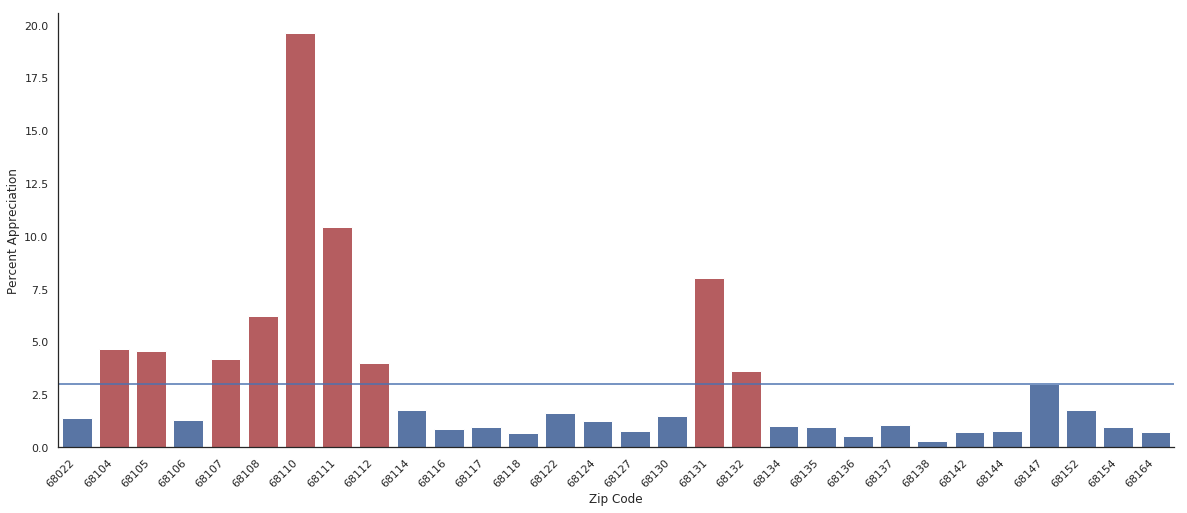

In [72]:
sns.set(style='white', color_codes=True)
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
colors = ['b', 'r','r', 'b', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
sns.despine()
zipcode = df_percent
ax = sns.barplot(x='Zip Code', y='Percent Appreciation', data=zipcode, palette=colors)
city_avg = df_percent['Percent Appreciation'].mean()
ax.axhline(city_avg)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


Nine zip codes perform above average. These zip codes will be collected into a new dataframe.

In [73]:
index_names = df_omaha[(df_omaha['ZIP CODE'] == '68138') & (df_omaha['ZIP CODE'] == '68136') & (df_omaha['ZIP CODE'] == '68118') & (df_omaha['ZIP CODE'] == '68142') & (df_omaha['ZIP CODE'] == '68164') & (df_omaha['ZIP CODE'] == '68144') & (df_omaha['ZIP CODE'] == '68116') & (df_omaha['ZIP CODE'] == '68117') & (df_omaha['ZIP CODE'] == '68154') & (df_omaha['ZIP CODE'] == '68135') & (df_omaha['ZIP CODE'] == '68134') & (df_omaha['ZIP CODE'] == '68137') & (df_omaha['ZIP CODE'] == '68124') & (df_omaha['ZIP CODE'] == '68106') & (df_omaha['ZIP CODE'] == '68130') & (df_omaha['ZIP CODE'] == '68122') & (df_omaha['ZIP CODE'] == '68152') & (df_omaha['ZIP CODE'] == '68114') & (df_omaha['ZIP CODE'] == '68147') & (df_omaha['ZIP CODE'] == '68127')].index
df_omaha.drop(index_names, inplace=True, axis=0)
df_omaha.head()

,SOLD DATE,$/SQUARE FEET,ZIP CODE
0,2019-08-09,116.0,68137
1,2019-07-26,96.0,68136
2,2017-09-01,127.0,68046
3,2020-04-01,148.0,68135
4,2019-08-05,140.0,68135


The geospatial coordinates for each zip code are now needed. Redfin provides latitude and longitude values for each listing, so the coordinates for each zip code could be estimated by averaging these values, however a separate dataset already contianing these values will be uploaded for ease and accuracy.  

In [74]:
#https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=NE
df_omahazip = pd.read_csv('https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/download/?format=csv&refine.state=NE&timezone=America/Chicago&lang=en&use_labels_for_header=true&csv_separator=%3B', sep=';')
df_omahazip.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,68743,Jackson,NE,42.460155,-96.60668,-6,1,"42.460155,-96.60668"
1,68792,Wynot,NE,42.749481,-97.14372,-6,1,"42.749481,-97.14372"
2,68832,Doniphan,NE,40.763643,-98.38794,-6,1,"40.763643,-98.38794"
3,68636,Elgin,NE,42.009216,-98.13311,-6,1,"42.009216,-98.13311"
4,68118,Omaha,NE,41.263194,-96.17108,-6,1,"41.263194,-96.17108"


This data represents the entire state of Nebraksa and contains unnecessary information. It will be cleaned to only contain the data needed.

In [75]:
df_omahazip.drop(['State', 'Timezone', 'Daylight savings time flag', 'geopoint'], axis = 1, inplace=True)
df_omahazip.head()

,Zip,City,Latitude,Longitude
0,68743,Jackson,42.460155,-96.60668
1,68792,Wynot,42.749481,-97.14372
2,68832,Doniphan,40.763643,-98.38794
3,68636,Elgin,42.009216,-98.13311
4,68118,Omaha,41.263194,-96.17108


In [76]:
df_omahazip = df_omahazip.loc[df_omahazip['City'] == 'Omaha']
df_omahazip.head()

,Zip,City,Latitude,Longitude
4,68118,Omaha,41.263194,-96.171080
7,68180,Omaha,41.291736,-96.171104
11,68278,Omaha,41.264333,-95.946368
44,68181,Omaha,41.291736,-96.171104
53,68145,Omaha,41.291736,-96.171104


In [77]:
df_omahazip['Zip'].unique()

array([68118, 68180, 68278, 68181, 68145, 68137, 68107, 68135, 68120,
       68157, 68105, 68110, 68104, 68114, 68164, 68155, 68117, 68122,
       68102, 68134, 68142, 68109, 68124, 68139, 68182, 68127, 68130,
       68112, 68131, 68154, 68106, 68176, 68101, 68111, 68179, 68132,
       68116, 68103, 68119, 68175, 68144, 68183, 68136, 68172, 68178,
       68138, 68108, 68198, 68152])

In [78]:
df_omahazip.dtypes

Zip            int64
City          object
Latitude     float64
Longitude    float64
dtype: object

In [79]:
df = df_omahazip[(df_omahazip['Zip'] == 68022) | (df_omahazip['Zip'] == 68132)
                | (df_omahazip['Zip'] == 68112) | (df_omahazip['Zip'] == 68105)
                | (df_omahazip['Zip'] == 68107) | (df_omahazip['Zip'] == 68104)
                | (df_omahazip['Zip'] == 68108) | (df_omahazip['Zip'] == 68131)
                | (df_omahazip['Zip'] == 68111) | (df_omahazip['Zip'] == 68110)]
df

,Zip,City,Latitude,Longitude
60,68107,Omaha,41.205198,-95.95539
133,68105,Omaha,41.240854,-95.96383
147,68110,Omaha,41.292321,-95.93427
150,68104,Omaha,41.292445,-96.00060
313,68112,Omaha,41.334947,-95.95924
326,68131,Omaha,41.264418,-95.96383
414,68111,Omaha,41.294547,-95.96434
459,68132,Omaha,41.265650,-95.99741
628,68108,Omaha,41.240562,-95.93353


In [80]:
coord_68022 = pd.DataFrame([[68022, 'Omaha', 41.2891, -96.2482]], columns=('Zip', 'City', 'Latitude', 'Longitude'))
df_coord = pd.concat([df, coord_68022], axis=0)
df_coord['Zip'] = df_coord['Zip'].astype(str)
df_coord

,Zip,City,Latitude,Longitude
60,68107,Omaha,41.205198,-95.95539
133,68105,Omaha,41.240854,-95.96383
147,68110,Omaha,41.292321,-95.93427
150,68104,Omaha,41.292445,-96.00060
313,68112,Omaha,41.334947,-95.95924
326,68131,Omaha,41.264418,-95.96383
414,68111,Omaha,41.294547,-95.96434
459,68132,Omaha,41.265650,-95.99741
628,68108,Omaha,41.240562,-95.93353
0,68022,Omaha,41.289100,-96.24820


With this dataframe containing the highest appreciating zip codes and the coordinates associated, a map of the city can be generated using folium with blue dots representing each area of examination.

In [81]:
!conda install -c conda-forge geopy --yes
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from geopy.geocoders import Nominatim
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [82]:
address = 'Omaha, NE'

geolocator = Nominatim(user_agent='ne_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Omaha, Nebraska are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Omaha, Nebraska are 41.2587459, -95.9383758.


In [83]:
map_omaha = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, zipcode in zip(df_coord['Latitude'], df_coord['Longitude'], df_coord['Zip']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_omaha)
    
map_omaha

Now that a visualization of the city of Omaha with the zip codes marked that have the highest yearly appreciation rates has been generated we can begin the final stage of the project. Foursquare API will be harnessed to obtain the most popular venues of each of the top nine zip codes. These zip codes will then be clustered into groups using machine learning.

In [84]:
# The code was removed by Watson Studio for sharing.

In [85]:
import requests

A loop to generate a list of nearby venues for each zip code.

In [86]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip',
                            'Zip Latitude',
                            'Zip Longitude',
                            'Venue',
                            'Venue Latitude',
                            'Venue Longitude',
                            'Venue Category']
    
    return(nearby_venues)

In [87]:
omaha_venues = getNearbyVenues(names=df_coord['Zip'],
                              latitudes=df_coord['Latitude'],
                              longitudes=df_coord['Longitude'])

68107
68105
68110
68104
68112
68131
68111
68132
68108
68022


In [88]:
omaha_venues.shape

(266, 7)

In [89]:
omaha_venues.head(10)

,Zip,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,68107,41.205198,-95.95539,International Bakery,41.206830,-95.947211,Bakery
1,68107,41.205198,-95.95539,Johnny's Cafe,41.211973,-95.951769,Steakhouse
2,68107,41.205198,-95.95539,Taqueria El Rey,41.205269,-95.946791,Mexican Restaurant
3,68107,41.205198,-95.95539,Donohue's Pub,41.212523,-95.962223,Dive Bar
4,68107,41.205198,-95.95539,El Dorado,41.205810,-95.947081,Mexican Restaurant
5,68107,41.205198,-95.95539,Abelardo's Mexican Fresh,41.205289,-95.960874,Mexican Restaurant
6,68107,41.205198,-95.95539,QuikTrip,41.210956,-95.961295,Convenience Store
7,68107,41.205198,-95.95539,The Salvation Army Kroc Center,41.197334,-95.956183,Gym / Fitness Center
8,68107,41.205198,-95.95539,Taqueria Tijuana,41.205700,-95.946877,Taco Place
9,68107,41.205198,-95.95539,La Esmeralda,41.205192,-95.962106,Mexican Restaurant


Now that a dataframe of nearby venues has been generated, we need to group them by zip code.

In [90]:
omaha_venues.groupby('Zip').count()

,Zip Latitude,Zip Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip,,,,,,
68022,6,6,6,6,6,6
68104,42,42,42,42,42,42
68105,18,18,18,18,18,18
68107,32,32,32,32,32,32
68108,32,32,32,32,32,32
68110,11,11,11,11,11,11
68111,19,19,19,19,19,19
68112,21,21,21,21,21,21
68131,56,56,56,56,56,56


Onehot encoding will be used for the purposes of k-means clustering.

In [91]:
omaha_onehot = pd.get_dummies(omaha_venues[['Venue Category']], prefix='', prefix_sep='')
omaha_onehot['Zip'] = omaha_venues['Zip']
fixed_columns = [omaha_onehot.columns[-1]] + list(omaha_onehot.columns[:-1])
omaha_onehot = omaha_onehot[fixed_columns]
omaha_onehot.head()

,Zip,ATM,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auditorium,Auto Workshop,Automotive Shop,...,Thrift / Vintage Store,Tourist Information Center,Trail,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Shop,Wings Joint,Yoga Studio
0,68107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
omaha_onehot.shape

(266, 113)

In [93]:
omaha_grouped = omaha_onehot.groupby('Zip').mean().reset_index()
omaha_grouped

,Zip,ATM,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auditorium,Auto Workshop,Automotive Shop,...,Thrift / Vintage Store,Tourist Information Center,Trail,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Store,Whisky Bar,Wine Shop,Wings Joint,Yoga Studio
0,68022,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,68104,0.000000,0.000000,0.000000,0.02381,0.02381,0.000000,0.02381,0.000000,0.02381,...,0.023810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,68105,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,68107,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,68108,0.000000,0.000000,0.000000,0.06250,0.00000,0.000000,0.00000,0.000000,0.03125,...,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,68110,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.090909,0.00000,...,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,68111,0.000000,0.000000,0.000000,0.00000,0.00000,0.052632,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,68112,0.047619,0.047619,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
8,68131,0.000000,0.035714,0.017857,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.017857,0.017857,0.017857,0.017857,0.000000,0.017857,0.000000
9,68132,0.000000,0.068966,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483


In [94]:
omaha_grouped.dtypes

Zip                               object
ATM                              float64
American Restaurant              float64
Antique Shop                     float64
Art Gallery                      float64
Arts & Crafts Store              float64
Asian Restaurant                 float64
Auditorium                       float64
Auto Workshop                    float64
Automotive Shop                  float64
BBQ Joint                        float64
Bakery                           float64
Bar                              float64
Baseball Field                   float64
Beer Store                       float64
Bookstore                        float64
Boutique                         float64
Bowling Alley                    float64
Breakfast Spot                   float64
Brewery                          float64
Bubble Tea Shop                  float64
Burger Joint                     float64
Bus Station                      float64
Business Service                 float64
Castle          

In [95]:
omaha_grouped.shape

(10, 113)

In [96]:
num_top_venues = 10
for code in omaha_grouped['Zip']:
    print('----'+code+'----')
    temp = omaha_grouped[omaha_grouped['Zip'] == code].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----68022----
                        venue  freq
0                        Park  0.33
1              Baseball Field  0.33
2                Home Service  0.17
3  Construction & Landscaping  0.17
4          Mexican Restaurant  0.00
5                  Playground  0.00
6                 Planetarium  0.00
7                 Pizza Place  0.00
8                    Pharmacy  0.00
9       Performing Arts Venue  0.00


----68104----
                  venue  freq
0                   Bar  0.10
1           Gas Station  0.05
2            Restaurant  0.02
3                 Diner  0.02
4        Discount Store  0.02
5        Lingerie Store  0.02
6            Shoe Store  0.02
7  Fast Food Restaurant  0.02
8        Sandwich Place  0.02
9            Food Truck  0.02


----68105----
                venue  freq
0                Park  0.11
1  Mexican Restaurant  0.11
2    Dentist's Office  0.06
3        Tennis Court  0.06
4   Convenience Store  0.06
5        Burger Joint  0.06
6         Social Club  0.06
7   

Now that we have a list of the nearby venues for each of the zip codes in question we can generate a dataframe containing only the most popular in order to get an idea of which businesses each area is the most likely to support.

In [97]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [98]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Zip']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
zip_venues_sorted = pd.DataFrame(columns=columns)
zip_venues_sorted['Zip'] = omaha_grouped['Zip']

for ind in np.arange(omaha_grouped.shape[0]):
    zip_venues_sorted.iloc[ind, 1:] = return_most_common_venues(omaha_grouped.iloc[ind, :], num_top_venues)
    
zip_venues_sorted.head(10)

,Zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,68022,Park,Baseball Field,Construction & Landscaping,Home Service,Food Service,Dentist's Office,Diner,Discount Store,Dive Bar,Dog Run
1,68104,Bar,Gas Station,Brewery,Restaurant,Pub,Pool,Burger Joint,Pizza Place,Business Service,Music Venue
2,68105,Mexican Restaurant,Park,Historic Site,Intersection,Dentist's Office,Greek Restaurant,Pool,Burger Joint,Dog Run,Brewery
3,68107,Mexican Restaurant,Convenience Store,Discount Store,Gym / Fitness Center,Pizza Place,Supermarket,Dive Bar,Restaurant,Salsa Club,Seafood Restaurant
4,68108,Dive Bar,Art Gallery,Sandwich Place,Mexican Restaurant,Discount Store,Performing Arts Venue,Pharmacy,Lawyer,Smoke Shop,Italian Restaurant
5,68110,Golf Course,Grocery Store,Thrift / Vintage Store,Discount Store,Shipping Store,Convenience Store,Baseball Field,Italian Restaurant,Construction & Landscaping,Auto Workshop
6,68111,Gym / Fitness Center,Fast Food Restaurant,Discount Store,Bus Station,Grocery Store,IT Services,Gas Station,Fried Chicken Joint,Park,Cosmetics Shop
7,68112,Pharmacy,Pizza Place,Historic Site,Sandwich Place,American Restaurant,Clothing Store,Convenience Store,Discount Store,Farmers Market,Fast Food Restaurant
8,68131,Bar,Park,Sandwich Place,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Gastropub,American Restaurant,Lounge,Cocktail Bar
9,68132,Bar,Coffee Shop,American Restaurant,Gas Station,Pizza Place,Massage Studio,Playground,Park,New American Restaurant,Dive Bar


Lets group the zip codes into 5 clusters.

In [99]:
kclusters = 5
omaha_grouped_clustering = omaha_grouped.drop('Zip', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(omaha_grouped_clustering)
kmeans.labels_[0:10]

array([2, 1, 1, 3, 1, 0, 4, 1, 1, 1], dtype=int32)

In [100]:
omaha_grouped.dtypes

Zip                               object
ATM                              float64
American Restaurant              float64
Antique Shop                     float64
Art Gallery                      float64
Arts & Crafts Store              float64
Asian Restaurant                 float64
Auditorium                       float64
Auto Workshop                    float64
Automotive Shop                  float64
BBQ Joint                        float64
Bakery                           float64
Bar                              float64
Baseball Field                   float64
Beer Store                       float64
Bookstore                        float64
Boutique                         float64
Bowling Alley                    float64
Breakfast Spot                   float64
Brewery                          float64
Bubble Tea Shop                  float64
Burger Joint                     float64
Bus Station                      float64
Business Service                 float64
Castle          

In [101]:
zip_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
omaha_grouped = df_coord
omaha_grouped = omaha_grouped.join(zip_venues_sorted.set_index('Zip'), on='Zip')

omaha_grouped.tail(10)

,Zip,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,68107,Omaha,41.205198,-95.95539,3,Mexican Restaurant,Convenience Store,Discount Store,Gym / Fitness Center,Pizza Place,Supermarket,Dive Bar,Restaurant,Salsa Club,Seafood Restaurant
133,68105,Omaha,41.240854,-95.96383,1,Mexican Restaurant,Park,Historic Site,Intersection,Dentist's Office,Greek Restaurant,Pool,Burger Joint,Dog Run,Brewery
147,68110,Omaha,41.292321,-95.93427,0,Golf Course,Grocery Store,Thrift / Vintage Store,Discount Store,Shipping Store,Convenience Store,Baseball Field,Italian Restaurant,Construction & Landscaping,Auto Workshop
150,68104,Omaha,41.292445,-96.00060,1,Bar,Gas Station,Brewery,Restaurant,Pub,Pool,Burger Joint,Pizza Place,Business Service,Music Venue
313,68112,Omaha,41.334947,-95.95924,1,Pharmacy,Pizza Place,Historic Site,Sandwich Place,American Restaurant,Clothing Store,Convenience Store,Discount Store,Farmers Market,Fast Food Restaurant
326,68131,Omaha,41.264418,-95.96383,1,Bar,Park,Sandwich Place,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Gastropub,American Restaurant,Lounge,Cocktail Bar
414,68111,Omaha,41.294547,-95.96434,4,Gym / Fitness Center,Fast Food Restaurant,Discount Store,Bus Station,Grocery Store,IT Services,Gas Station,Fried Chicken Joint,Park,Cosmetics Shop
459,68132,Omaha,41.265650,-95.99741,1,Bar,Coffee Shop,American Restaurant,Gas Station,Pizza Place,Massage Studio,Playground,Park,New American Restaurant,Dive Bar
628,68108,Omaha,41.240562,-95.93353,1,Dive Bar,Art Gallery,Sandwich Place,Mexican Restaurant,Discount Store,Performing Arts Venue,Pharmacy,Lawyer,Smoke Shop,Italian Restaurant
0,68022,Omaha,41.289100,-96.24820,2,Park,Baseball Field,Construction & Landscaping,Home Service,Food Service,Dentist's Office,Diner,Discount Store,Dive Bar,Dog Run


A test to find and remove any null values if neccessary.

In [102]:
bool_series = pd.isnull(omaha_grouped['Cluster Labels'])
df[bool_series]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Zip,City,Latitude,Longitude


In [103]:
#omaha_grouped.drop([118, 121], inplace=True)

In [104]:
bool_series = pd.isnull(omaha_grouped['Cluster Labels'])
omaha_grouped[bool_series]

,Zip,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Now to visualize the cluster groups on the same map of Omaha zip codes.

In [105]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(omaha_grouped['Latitude'], omaha_grouped['Longitude'], omaha_grouped['Zip'], omaha_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Cluster One

In [106]:
omaha_grouped.loc[omaha_grouped['Cluster Labels'] == 0, omaha_grouped.columns[[1] + list(range(5, omaha_grouped.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
147,Omaha,Golf Course,Grocery Store,Thrift / Vintage Store,Discount Store,Shipping Store,Convenience Store,Baseball Field,Italian Restaurant,Construction & Landscaping,Auto Workshop


## Cluster Two

In [107]:
omaha_grouped.loc[omaha_grouped['Cluster Labels'] == 1, omaha_grouped.columns[[1] + list(range(5, omaha_grouped.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
133,Omaha,Mexican Restaurant,Park,Historic Site,Intersection,Dentist's Office,Greek Restaurant,Pool,Burger Joint,Dog Run,Brewery
150,Omaha,Bar,Gas Station,Brewery,Restaurant,Pub,Pool,Burger Joint,Pizza Place,Business Service,Music Venue
313,Omaha,Pharmacy,Pizza Place,Historic Site,Sandwich Place,American Restaurant,Clothing Store,Convenience Store,Discount Store,Farmers Market,Fast Food Restaurant
326,Omaha,Bar,Park,Sandwich Place,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Gastropub,American Restaurant,Lounge,Cocktail Bar
459,Omaha,Bar,Coffee Shop,American Restaurant,Gas Station,Pizza Place,Massage Studio,Playground,Park,New American Restaurant,Dive Bar
628,Omaha,Dive Bar,Art Gallery,Sandwich Place,Mexican Restaurant,Discount Store,Performing Arts Venue,Pharmacy,Lawyer,Smoke Shop,Italian Restaurant


## Cluster Three

In [108]:
omaha_grouped.loc[omaha_grouped['Cluster Labels'] == 2, omaha_grouped.columns[[1] + list(range(5, omaha_grouped.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Omaha,Park,Baseball Field,Construction & Landscaping,Home Service,Food Service,Dentist's Office,Diner,Discount Store,Dive Bar,Dog Run


## Cluster Four

In [109]:
omaha_grouped.loc[omaha_grouped['Cluster Labels'] == 3, omaha_grouped.columns[[1] + list(range(5, omaha_grouped.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
60,Omaha,Mexican Restaurant,Convenience Store,Discount Store,Gym / Fitness Center,Pizza Place,Supermarket,Dive Bar,Restaurant,Salsa Club,Seafood Restaurant


## Cluster Five

In [110]:
omaha_grouped.loc[omaha_grouped['Cluster Labels'] == 4, omaha_grouped.columns[[1] + list(range(5, omaha_grouped.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
414,Omaha,Gym / Fitness Center,Fast Food Restaurant,Discount Store,Bus Station,Grocery Store,IT Services,Gas Station,Fried Chicken Joint,Park,Cosmetics Shop


With the zip codes being clustered by popular venue, we have more information about area preferences when it comes to the types of businesses the individual populations like to support. As we can see, the residents of cluster three seek out more active activities whereas the individuals in cluster two enjoy an active nightlife of bars and restaurants.